In [250]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [251]:
car_data = pd.read_csv("CarPrice.csv", sep=",")
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [252]:
car_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [253]:
car_data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [254]:
# car_data.loc[:,'CarName', "horsepower", "highwaympg"]

In [255]:
car_data.shape

(205, 26)

In [256]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [257]:
car_data.describe()
# car_data.drop_duplicates(inplace= True)

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [258]:
car_data.isnull().any()

car_ID              False
symboling           False
CarName             False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
dtype: bool

In [259]:
car_data.isnull().sum()/ car_data.shape[0]

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

In [260]:
car_data.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [261]:
car_df = car_data[["symboling", "wheelbase", "carlength",
             "carwidth", "carheight", "curbweight",
             "enginesize", "boreratio", "stroke",
             "compressionratio", "horsepower", "peakrpm",
             "citympg", "highwaympg", "price"]]


car_df

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


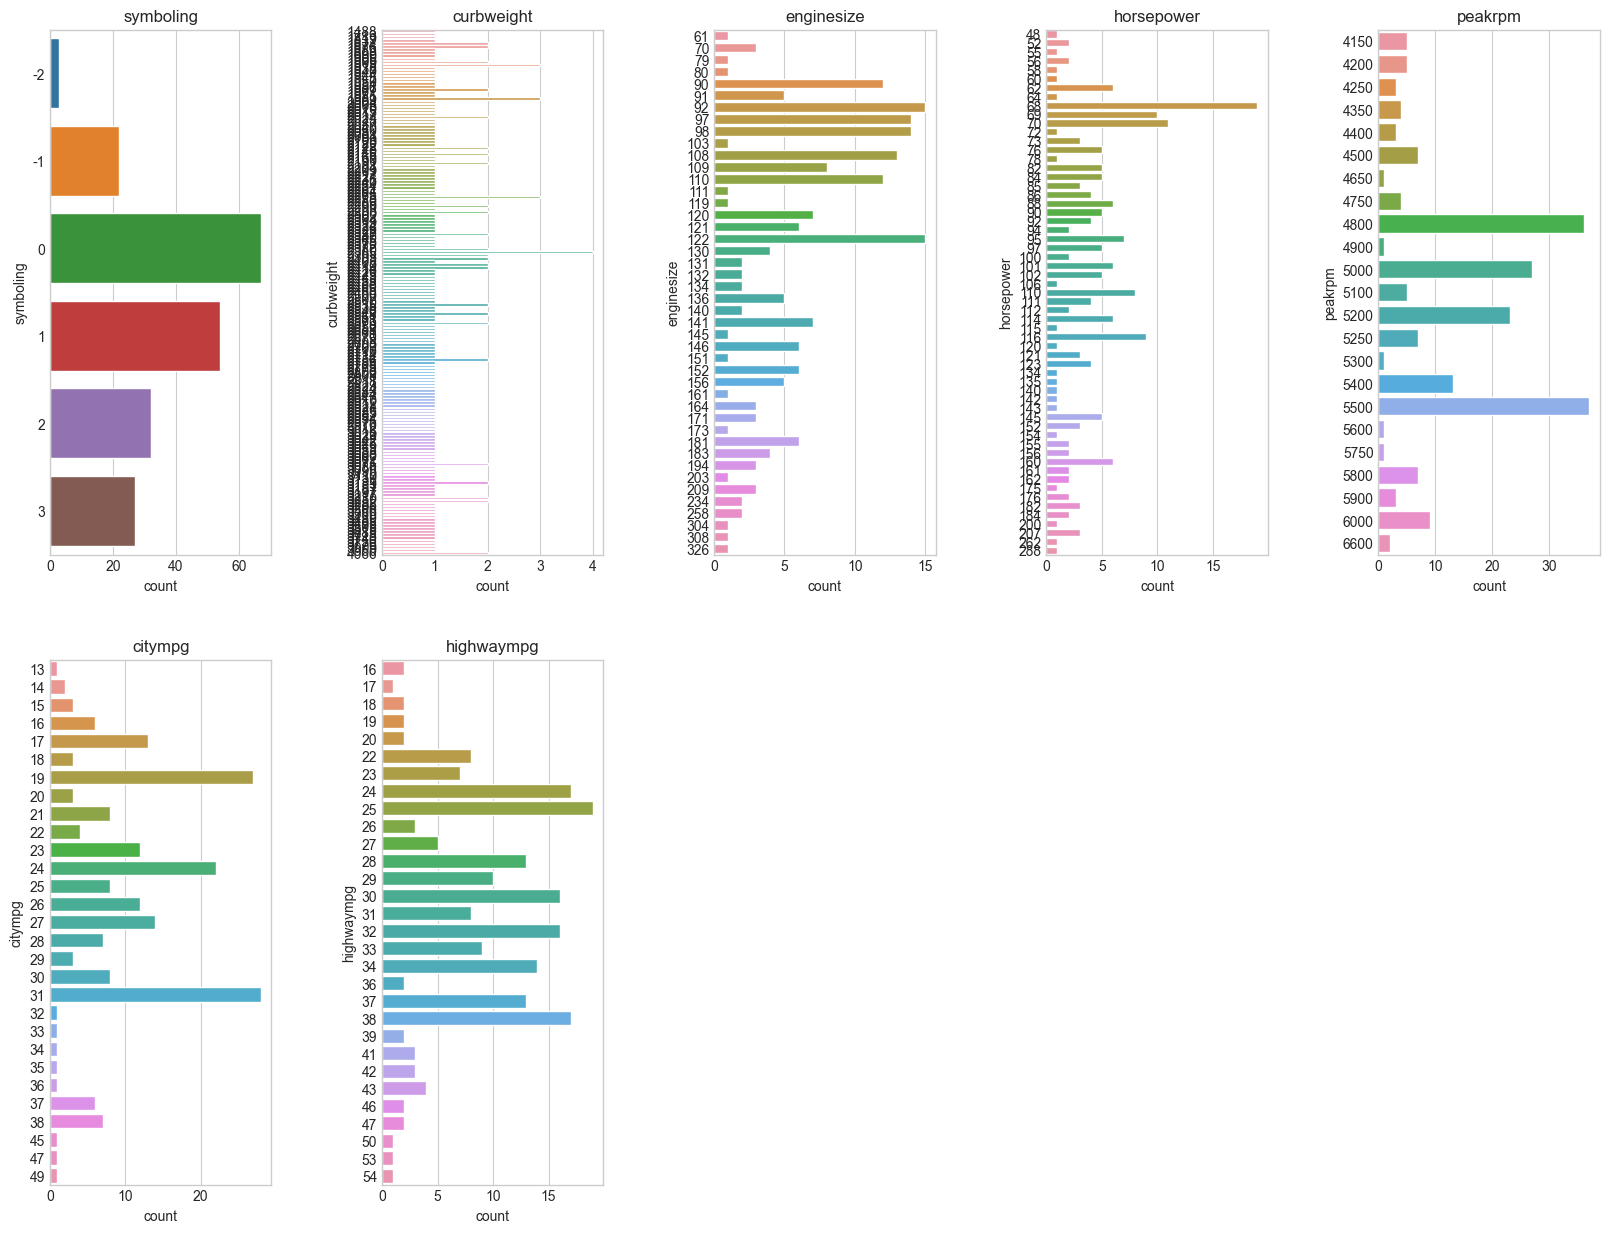

In [262]:
def plot_bivariate_bar(dataset, cols, width, height, hspace, wspace):
    dataset = dataset.select_dtypes(include=[np.int64])
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.int64:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:15] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)

plot_bivariate_bar(car_df, cols=5, width=20, height=15, hspace=0.2, wspace=0.5)

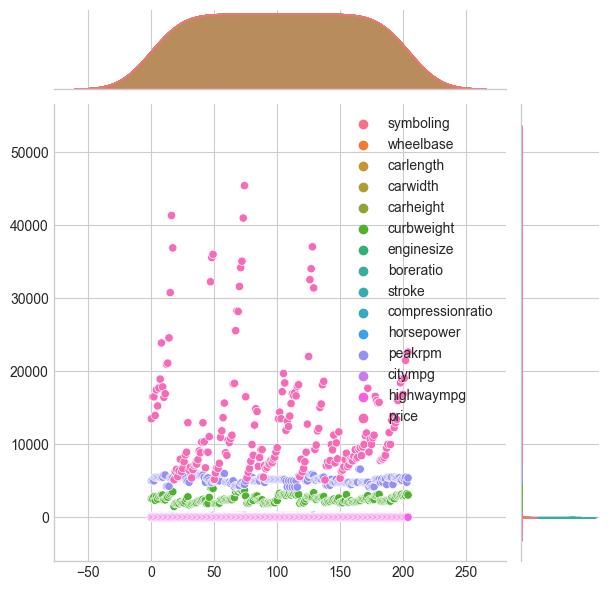

In [263]:
sns.jointplot(data=car_df)
plt.show()

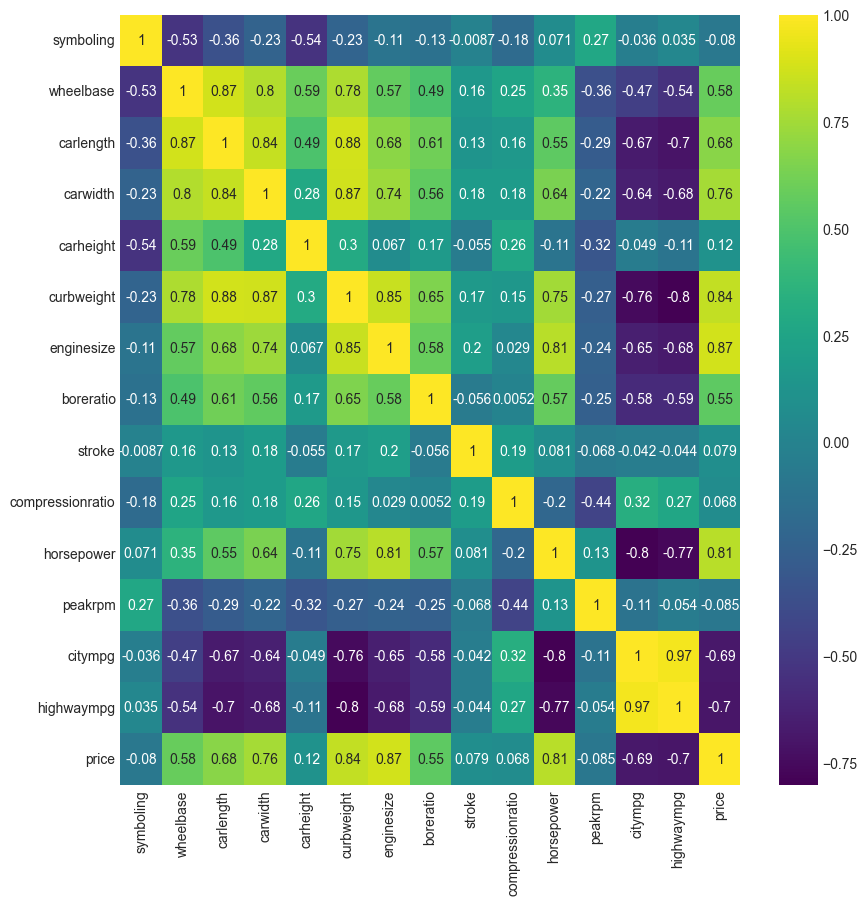

In [264]:
plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
sns.heatmap(car_df.corr(), annot = True, cmap = 'viridis')
plt.show()

In [265]:
predict = "price"
x = car_df.drop([predict], 1)
y = car_df[predict]
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=42,
                                   test_size=0.30,
                                   shuffle=True)

C:\Users\user\AppData\Local\Temp\ipykernel_2848\3959129228.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = car_df.drop([predict], 1)


In [266]:
xtrain

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
177,-1,102.4,175.6,66.5,53.9,2458,122,3.31,3.54,8.7,92,4200,27,32
75,1,102.7,178.4,68.0,54.8,2910,140,3.78,3.12,8.0,175,5000,19,24
174,-1,102.4,175.6,66.5,54.9,2480,110,3.27,3.35,22.5,73,4500,30,33
31,2,86.6,144.6,63.9,50.8,1819,92,2.91,3.41,9.2,76,6000,31,38
12,0,101.2,176.8,64.8,54.3,2710,164,3.31,3.19,9.0,121,4250,21,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,1,99.2,178.5,67.9,49.7,3139,181,3.43,3.27,9.0,160,5200,19,25
14,1,103.5,189.0,66.9,55.7,3055,164,3.31,3.19,9.0,121,4250,20,25
92,1,94.5,165.3,63.8,54.5,1938,97,3.15,3.29,9.4,69,5200,31,37
179,3,102.9,183.5,67.7,52.0,3016,171,3.27,3.35,9.3,161,5200,19,24


In [267]:
xtest

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
15,0,103.5,189.0,66.9,55.7,3230,209,3.62,3.390,8.00,182,5400,16,22
9,0,99.5,178.2,67.9,52.0,3053,131,3.13,3.400,7.00,160,5500,16,22
100,0,97.2,173.4,65.2,54.7,2302,120,3.33,3.470,8.50,97,5200,27,34
132,3,99.1,186.6,66.5,56.1,2658,121,3.54,3.070,9.31,110,5250,21,28
68,-1,110.0,190.9,70.3,58.7,3750,183,3.58,3.640,21.50,123,4350,22,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,3,95.3,169.0,65.7,49.6,2380,70,3.33,3.255,9.40,101,6000,17,23
128,3,89.5,168.9,65.0,51.6,2800,194,3.74,2.900,9.50,207,5900,17,25
76,2,93.7,157.3,64.4,50.8,1918,92,2.97,3.230,9.40,68,5500,37,41
144,0,97.0,172.0,65.4,54.3,2385,108,3.62,2.640,9.00,82,4800,24,25


In [268]:
ytrain

177    11248.0
75     16503.0
174    10698.0
31      6855.0
12     20970.0
        ...   
106    18399.0
14     24565.0
92      6849.0
179    15998.0
102    14399.0
Name: price, Length: 143, dtype: float64

In [269]:
ytest

15     30760.000
9      17859.167
100     9549.000
132    11850.000
68     28248.000
         ...    
56     11845.000
128    37028.000
76      5389.000
144     9233.000
104    17199.000
Name: price, Length: 62, dtype: float64

In [270]:
model = LinearRegression()
# model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)

LinearRegression()

In [271]:
model.score(xtrain, ytrain)

0.8682422281579012

In [272]:
# malibu = pd.read_csv("Malibu.csv")
# malibu

In [275]:
predictions = model.predict(xtest)
a = car_data.iloc[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61]]
data = pd.DataFrame({"Car_Name":a.CarName, "Predictions": predictions})

In [276]:
data.head(31)

,Car_Name,Predictions
0,alfa-romero giulia,26208.153727
1,alfa-romero stelvio,17362.609133
2,alfa-romero Quadrifoglio,10091.449767
3,audi 100 ls,14799.137112
4,audi 100ls,24902.620418
5,audi fox,6071.063463
6,audi 100ls,8136.120474
7,audi 5000,6910.519118
8,audi 4000,11488.638602
9,audi 5000s (diesel),9184.332470


In [277]:
print('R2_score:', r2_score(ytest, predictions))
print('Mean Absolute Error:', mean_absolute_error(ytest, predictions))
print('Mean Squared Error:', mean_squared_error(ytest, predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(ytest, predictions)))

R2_score: 0.8002447412986149
Mean Absolute Error: 2596.575660028883
Mean Squared Error: 13839918.973460423
Root Mean Squared Error: 3720.2041574973305
